# Weekly project
This weeks weekly project is a continuation of last weeks exercises.

You are to make a handwritten number classifier. Where we will be using the [mnist dataset](https://en.wikipedia.org/wiki/MNIST_database).

![image.png](attachment:image.png)

**Create a program that given an image from the mnist dataset.**
- You are free to use any algorithm you want to achieve this.
- It should be able to given a number classify what number it is.
- Accuracy should at least be 80%

If you decide to use a svm make sure you also use dimensionality reduction. SVM of the full mnist dataset will take around 4-8 hours depending on your pc.



**Challange:**
- Try to reach 98% accuracy.
- Try to classify faces with the labeled wild faces dataset [lwf](http://vis-www.cs.umass.edu/lfw/)
```{Python}
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
```

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml

import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# mnist = fetch_openml('mnist_784', version=1)

# images = mnist.data.to_numpy()
# targets = mnist.target.to_numpy()

# print(images.shape)
# print(targets.shape)

In [15]:
# def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
#     '''
#     Visualize random digits in a grid plot
#     images - array of flatten gidigs [:,784]
#     targets - final labels
#     '''
#     nsamples=sample_size
#     rand_idx = np.random.choice(images.shape[0], nsamples)
#     images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


#     img = plt.figure(1, figsize=(10, 5), dpi=160)
#     for index, (image, label) in enumerate(images_and_labels):
#         plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
#         plt.axis('off')
#         #each image is flat, we have to reshape to 2D array 28x28-784
#         plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
#         plt.title(title_text.format(label))
#     plt.show()

# # draw 12 images along with their labels
# show_some_digits(images, targets, 12)

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor()])
    #  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

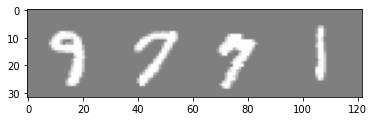

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [25]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [48]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels= 1, out_channels= 6, kernel_size= 3, padding=1)
        # self.pool = nn.MaxPool2d(3, 3, 1)
        self.conv2 = nn.Conv2d(in_channels= 6, out_channels= 16, kernel_size= 3, padding=1)
        self.fc1 = nn.Linear(16*28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [51]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # print(inputs.size())
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.379
[1,  4000] loss: 0.250
[1,  6000] loss: 0.193
[1,  8000] loss: 0.161
[1, 10000] loss: 0.137
[1, 12000] loss: 0.117
[1, 14000] loss: 0.108
[2,  2000] loss: 0.087
[2,  4000] loss: 0.087
[2,  6000] loss: 0.080
[2,  8000] loss: 0.076
[2, 10000] loss: 0.077
[2, 12000] loss: 0.062
[2, 14000] loss: 0.057
Finished Training


In [53]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %


In [59]:
from torchsummary import summary
summary(net, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
            Conv2d-2           [-1, 16, 28, 28]             880
            Linear-3                  [-1, 256]       3,211,520
            Linear-4                   [-1, 64]          16,448
            Linear-5                   [-1, 10]             650
Total params: 3,229,558
Trainable params: 3,229,558
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.13
Params size (MB): 12.32
Estimated Total Size (MB): 12.46
----------------------------------------------------------------
